In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts 

In [3]:
nyc_data = pd.read_csv('data/Traffic_Volume_Counts__2012-2013_.csv')

In [4]:
nyc_data.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76


In [59]:
congestion = []

count = 0
for key in nyc_data:
    if count > 6:
        congestion.extend(list(nyc_data[key]))
    count += 1
    
congestion = np.array(congestion)

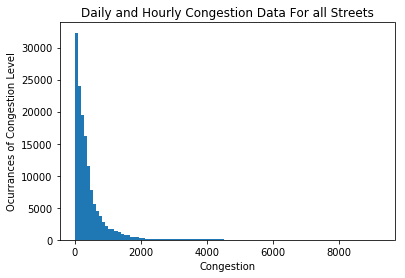

In [60]:
plt.hist(congestion, bins=100)
plt.title('Daily and Hourly Congestion Data For all Streets')
plt.xlabel('Congestion')
plt.ylabel('Ocurrances of Congestion Level')
plt.show()

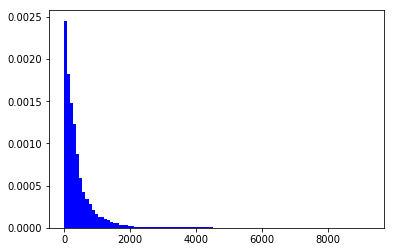

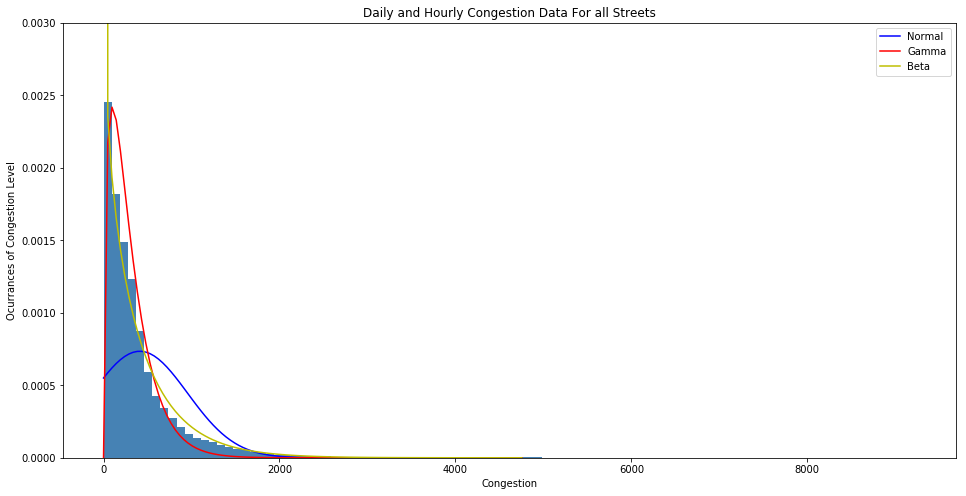

In [319]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = congestion.mean()
sigma = congestion.std()
x = np.linspace(0, mu+8*sigma, 100)
data = plt.hist(congestion, bins=100, density=True, color='blue')
y_data = data[0]
x_data = data[1]


plt.figure(figsize=(16,8))
data = plt.hist(congestion, bins=100, density=True, alpha=0)
plt.hist(congestion, bins=100, density=True, color='steelblue')
y_norm = sts.norm.pdf(x, mu, sigma)
plt.plot(x, y_norm, label="Normal", c='b')

fit_alpha, fit_loc, fit_scale=stats.gamma.fit(y_data)
y_gamma = stats.gamma.pdf(x, a=fit_alpha, scale=1/fit_scale)
y_gamma1 = stats.gamma.pdf(x, a=1.5, scale=200)
plt.plot(x, y_gamma1, "y-", label='Gamma', c='red')

ab,bb,cb,db = stats.beta.fit(congestion)  
pdf_beta = stats.beta.pdf(x, ab, bb,cb, db)  
plt.plot(x, pdf_beta, label="Beta", c='y')

plt.title('Daily and Hourly Congestion Data For all Streets')
plt.xlabel('Congestion')
plt.ylabel('Ocurrances of Congestion Level')
plt.ylim(0, .003)
plt.legend()
plt.show()

In [320]:
g_er = sum(abs(y_gamma1[1:] - y_data[1:]))

n_er = sum(abs(y_data - y_norm))

b_er = sum(abs(y_data[1:] - pdf_beta[1:]))

tot = sum(y_data)

print(g_er/tot, n_er/tot, b_er/tot, tot)

1.1089943345544055 1.4041437849372784 0.9931537063583579 0.010838545770636861


In [255]:
cg_by_time = []

count = 0
for key in nyc_data:
    if count > 6:
        cg_by_time.append(list(nyc_data[key]))
    count += 1
    
maxes = []
times = []

for i in range(len(cg_by_time[0])):
    mx = 0
    tm = 0
    for j in range(len(cg_by_time)):
        if cg_by_time[j][i] > mx:
            mx = cg_by_time[j][i]
            tm = j
    maxes.append(mx)
    times.append(tm)

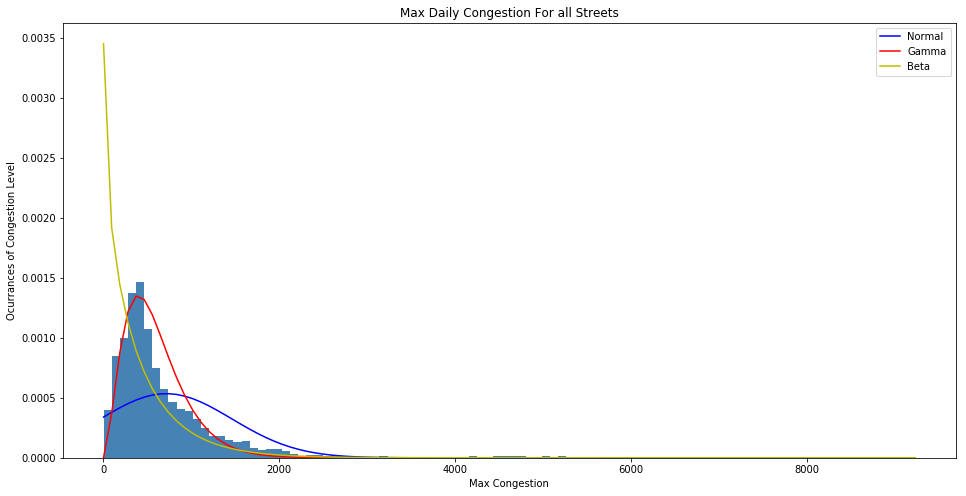

In [311]:
plt.figure(figsize=(16,8))
data = plt.hist(maxes, bins=100, density=True)
plt.hist(maxes, bins=100, density=True, color="steelblue")
y_data = data[0]
x = data[1]
mu = np.array(maxes).mean()
sigma = np.array(maxes).std()

y_norm = sts.norm.pdf(x, mu, sigma)
plt.plot(x, y_norm, label="Normal", c='b')

fit_alpha, fit_loc, fit_scale=stats.gamma.fit(y_data)
y_gamma = stats.gamma.pdf(x, a=fit_alpha, scale=1/fit_scale)
y_gamma1 = stats.gamma.pdf(x, a=3, scale=200)
plt.plot(x, y_gamma1, "y-", label='Gamma', c='red')

ab,bb,cb,db = stats.beta.fit(congestion)  
pdf_beta = stats.beta.pdf(x, ab, bb,cb, db)  
plt.plot(x, pdf_beta, label="Beta", c='y')

plt.legend()

plt.title('Max Daily Congestion For all Streets')
plt.xlabel('Max Congestion')
plt.ylabel('Ocurrances of Congestion Level')
plt.show()

In [317]:
g_er = sum(abs(y_gamma1[1:] - y_data))

n_er = sum(abs(y_data - y_norm[1:]))

b_er = sum(abs(y_data - pdf_beta[1:]))

tot = sum(y_data)

print(g_er/tot, n_er/tot, b_er/tot, tot)

0.22639715647012293 0.5318794642376132 0.566861332788913 0.010845598801778251


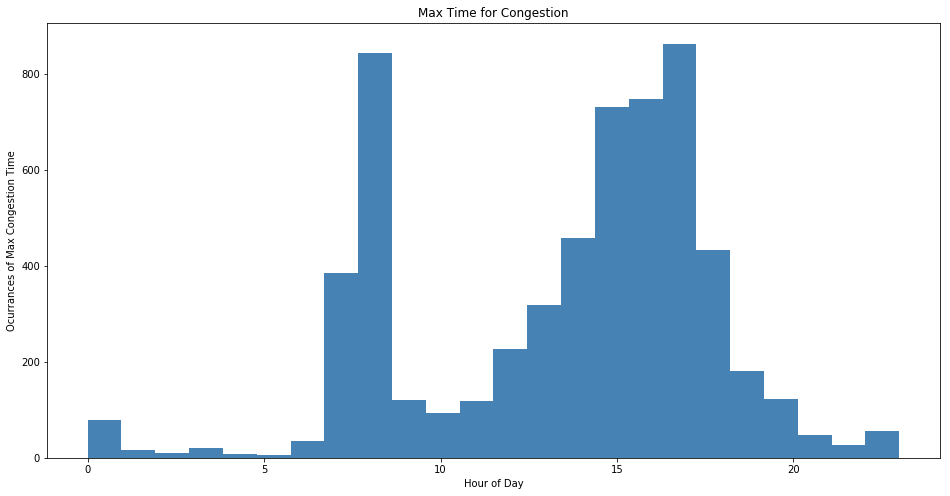

In [282]:
plt.figure(figsize=(16,8))
plt.hist(times, bins=24, color='steelblue')
plt.title('Max Time for Congestion')
plt.xlabel('Hour of Day')
plt.ylabel('Ocurrances of Max Congestion Time')
plt.show()